# The Mexican earthquake source parameter database

In [1]:
#ENV["PYTHON"]=""

""

In [17]:
using DataFrames
using GLM
using Plots

In [21]:
pyplot()
using LaTeXStrings

In [32]:
DataTo = readtable("BMPF-14junio2017Xyoli.csv");
DataGolfo = readtable("BMPF-14junio2017Golfo.csv");
DataSUB = readtable("BMPF-14junio2017SUBxyoli.csv");
DataTMVB = readtable("BMPF-14junio2017TMVB.csv")

,Evento,fecha,Tiempo,Lon,Lat,Prof,Magnitud,Mo,Caida_de_esfuerzos,freq_esc_,Radio,Desplamiento,Energía,Er_mo,strike,dip,rake,Lugar,none
1,2,1974-07-12,02:41:52.50,-99.2,19.21,7.0,3.8,5.34e14,5.33e6,5.47,0.16,0.2212,NA,NA,NA,NA,NA,TMVB,NA
2,3,1976-03-25,23:05:00.50,-99.33,20.4807,4.0,5.0,4.5e16,0.7,0.4,3.0,0.0531,NA,NA,242,64,-174,TMVB,NA
3,4,1976-10-04,06:59:16.41,-99.1458,20.4927,4.0,5.1,5.6e16,0.7,0.45,3.0,0.066,NA,NA,291,76,-25,TMVB,NA
4,42,1979-02-22,09:16:33,-100.1762,19.8936,8.19,5.5,1.75e17,8.236,0.635,2.02,0.4551,NA,NA,280,66,-48,TMVB,T
5,43,1979-02-22,10:38:00,-100.1909,19.9166,8.53,3.6,2.69e14,0.56,1.96,0.701,0.0058,NA,NA,NA,NA,NA,TMVB,T
6,44,1979-02-22,09:57:00,-100.2022,19.8738,4.96,3.4,1.38e14,0.06,1.26,1.005,0.0014,NA,NA,NA,NA,NA,TMVB,T
7,45,1979-02-22,10:26:00,-100.1773,19.8531,7.86,3.1,4.9e13,0.116,2.21,0.62,0.0014,NA,NA,NA,NA,NA,TMVB,T
8,46,1979-02-22,10:28:00,-100.135,19.8287,3.32,3.3,7.9e13,0.518,2.5,0.79,0.0013,NA,NA,NA,NA,NA,TMVB,T
9,47,1979-02-22,12:15:00,-100.1468,19.8853,9.72,3.3,9.02e13,0.613,3.16,0.4,0.006,NA,NA,NA,NA,NA,TMVB,T
10,48,1979-02-22,19:45:00,-100.1708,19.8352,4.96,3.9,7.95e14,0.405,1.17,1.12,0.0067,NA,NA,NA,NA,NA,TMVB,T


In [33]:
DataTo[:Magnitud]=round.(dropna(DataTo[:Magnitud]),1);
DataGolfo[:Magnitud]=round.(dropna(DataGolfo[:Magnitud]),1);
DataSUB[:Magnitud]=round.(dropna(DataSUB[:Magnitud]),1);
DataTMVB[:Magnitud]=round.(dropna(DataTMVB[:Magnitud]),1);

In [34]:
DataTo2 = DataTo[.~isna.(DataTo[:freq_esc_]),:]; # Remove and Fc -->> NA
SUB = DataSUB[.~isna.(DataSUB[:freq_esc_]),:]; # Remove and Fc -->> NA
TMVB = DataTMVB[.~isna.(DataTMVB[:freq_esc_]),:]; # # Remove

In [35]:
ReMwFc = fit(LinearModel,@formula(freq_esc_ ~ Magnitud),DataTo2)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   12.8683  0.201861  63.7481   <1e-99
Magnitud     -2.28621 0.0672685 -33.9863   <1e-99


In [36]:
ToMwfc(x)=coef(ReMwFc)[2] * x + coef(ReMwFc)[1];
#x = collect(1:8);
x = DataTo2[:Magnitud];
TocorrMwFc = ToMwfc(x);

In [37]:
sub = "MSZ";
golf = "GBC";
TM = "TMVB";


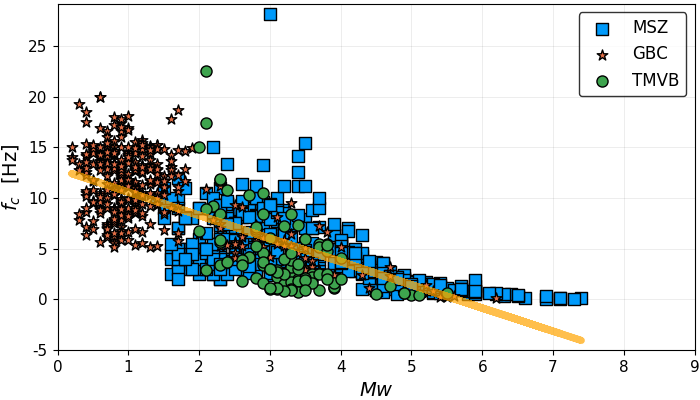

In [40]:
scatter((SUB[:Magnitud]),(SUB[:freq_esc_]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Magnitud]),(DataGolfo[:freq_esc_]),lab=golf,m=(8,:star5))
scatter!((TMVB[:Magnitud]),(TMVB[:freq_esc_]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
plot!(x,TocorrMwFc,linewidth=5,linealpha=0.7,lab="",c=:orange)
#PyPlot.savefig("MwvsFc-Regress.pdf",dpi=400)

In [41]:
DataTo2[:LogRa] = log10(DataTo2[:Radio]);
ReMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),DataTo2)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -1.35505  0.0158166 -85.6729   <1e-99
Magnitud     0.279396 0.00527074  53.0088   <1e-99


In [42]:
ToMwRa(x)=coef(ReMwRad)[2] * x + coef(ReMwRad)[1];
x = DataTo2[:Magnitud];
TocorrMwR = ToMwRa(x);

In [43]:
SUB[:LogRa] = log10(SUB[:Radio]);
DataGolfo[:LogRa] = log10(DataGolfo[:Radio]);
TMVB[:LogRa] = log10(TMVB[:Radio]);


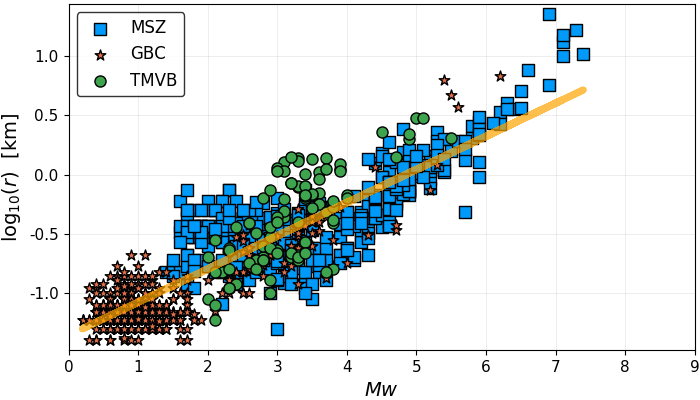

In [47]:
scatter((SUB[:Magnitud]),(SUB[:LogRa]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Magnitud]),(DataGolfo[:LogRa]),lab=golf,m=(8,:star5))
scatter!((TMVB[:Magnitud]),(TMVB[:LogRa]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
plot!(x,TocorrMwR,linewidth=5,linealpha=0.7,lab="",c=:orange)
#PyPlot.savefig("MwvsR-Regress.pdf",dpi=400)

In [48]:
SUB = SUB[(SUB[:Desplamiento]) .> 0,:]; # Remove Despla <  0
SUB[:LogD] = log10(SUB[:Desplamiento]);

DataGolfo = DataGolfo[(DataGolfo[:Desplamiento]) .> 0,:]; # Remove Despla <  0
DataGolfo[:LogD] = log10(DataGolfo[:Desplamiento]);

TMVB = TMVB[(TMVB[:Desplamiento]) .> 0,:]; # Remove Despla <  0
TMVB[:LogD] = log10(TMVB[:Desplamiento]);


In [49]:
Total = DataTo2[(DataTo2[:Desplamiento]) .> 0,:]; # Remove Despla <  0
Total[:LogD] = log10(Total[:Desplamiento]);
ToReMwD = fit(LinearModel,@formula(LogD ~ Magnitud),Total)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.94495 0.0320427 -154.324   <1e-99
Magnitud     0.861594 0.0105989  81.2906   <1e-99


In [50]:
ToMwD(x)=coef(ToReMwD)[2] * x + coef(ToReMwD)[1];
x = Total[:Magnitud];
TocorrMwD = ToMwD(x);


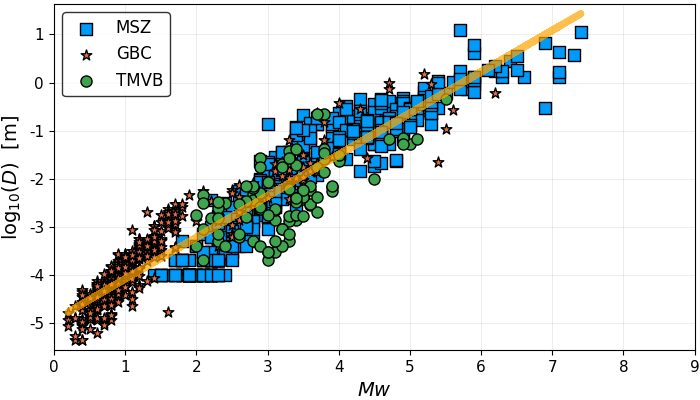

In [53]:
scatter((SUB[:Magnitud]),(SUB[:LogD]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Magnitud]),(DataGolfo[:LogD]),lab=golf,m=(8,:star5))
scatter!((TMVB[:Magnitud]),(TMVB[:LogD]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
plot!(x,TocorrMwD,linewidth=5,linealpha=0.7,lab="",c=:orange)
#PyPlot.savefig("MwvsDRegress.pdf",dpi=400)